In [1]:
%load_ext autoreload
%autoreload 2

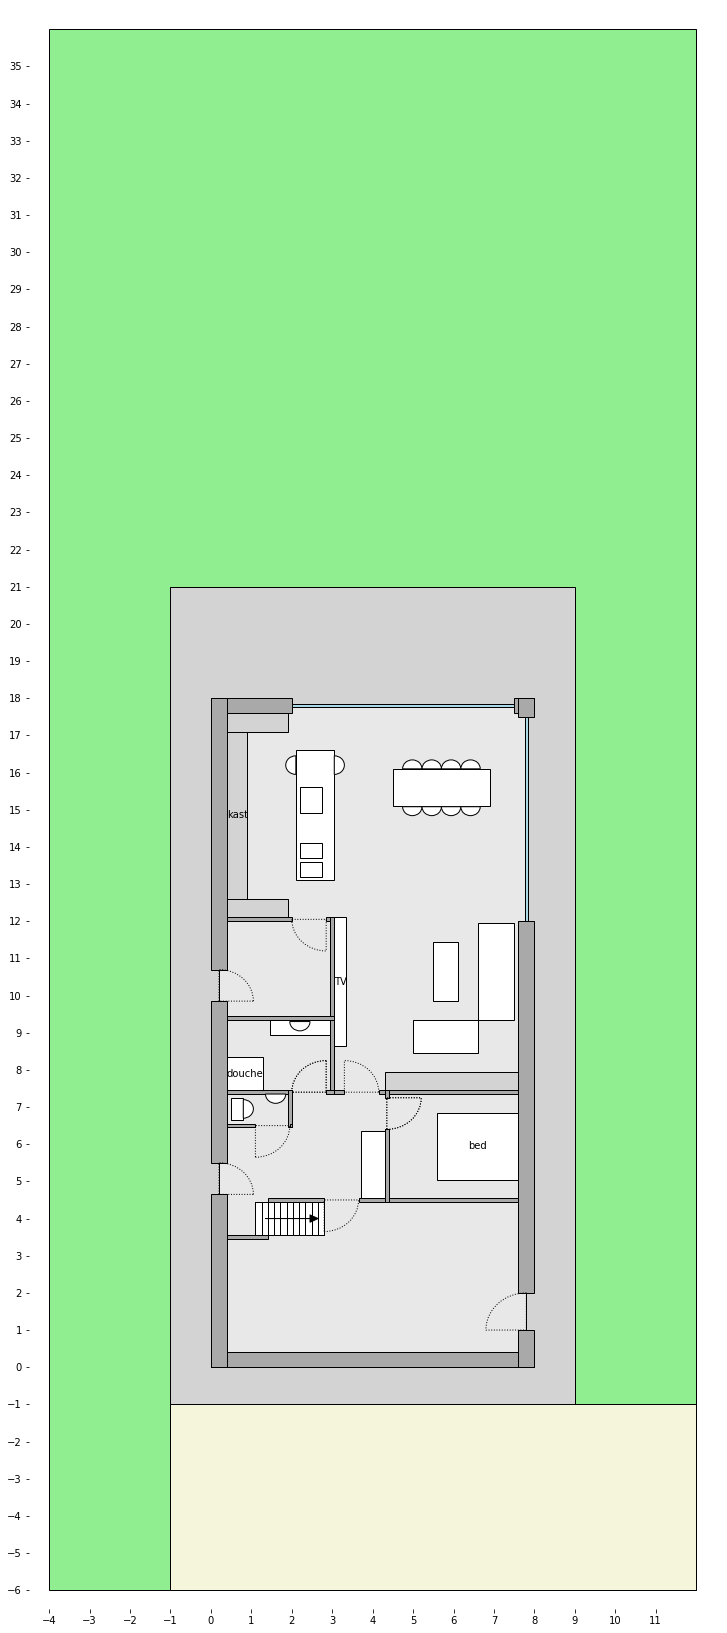

In [8]:
from floorplan2D import FloorPlan, InnerWall, OuterWall,Rect,Wall,HalfCircle,Arrow
import matplotlib.pyplot as plt
import numpy as np

fp = FloorPlan()

binnentop = 18-OuterWall.width
binnenbottom = OuterWall.width
binnenleft = OuterWall.width
binnenright = 8-OuterWall.width

fp.add(Rect(-4,-6,8+4,42-6,"lightgreen"))
fp.add(Rect(-1,-6,8+4,-1,"#f5f5dc"))
fp.add(Rect(-1,-1,8+1,18+3,"lightgrey"))
fp.add(Rect(OuterWall.width/2,
    OuterWall.width/2,
    8-OuterWall.width/2,
    18-OuterWall.width/2,
    "#e8e8e8"))


#OUTER WALLS
fp.add
o = OuterWall.horizontal(0,0,8,"bottom")
fp.add(o)

o = OuterWall.horizontal(18,0,8,"top")
o.window(2,7.5)
fp.add(o)

lo = OuterWall.vertical(0,0,18,"left")
fp.add(lo)

o = OuterWall.vertical(8,0,18,"right")
o.window(12,17.5)
o.door(1,"top","left",1)
fp.add(o)


# Keukenkast
keukenkasttop = binnentop
keukenkastbottom = binnentop - 5.5
keukenkastleft = binnenleft
keukenkastright = binnenleft + 0.5
r = Rect(keukenkastleft,
         keukenkastbottom,
         keukenkastright,
         keukenkasttop,
        "lightgrey",
        "kast")
fp.add(r)
fp.add(Rect(binnenleft,keukenkastbottom,binnenleft + 1.5,keukenkastbottom + 0.5,"lightgrey"))
fp.add(Rect(binnenleft,keukenkasttop-0.5,binnenleft + 1.5,keukenkasttop,"lightgrey"))
# kookeiland

kookeilandtop = binnentop - 1
kookeilandbottom = binnentop - 4.5
kookeilandleft = keukenkastright + 1.2
kookeilandright = kookeilandleft + 0.95
r = Rect(kookeilandleft,
         kookeilandbottom,
         kookeilandright,
         kookeilandtop,"white")
         #"kook\neiland","white")
fp.add(r)

vuurtop = kookeilandtop - 1
vuurbottom = vuurtop- 0.70
vuurleft = kookeilandleft + 0.1
vuurright = kookeilandright - 0.3
fp.add(Rect(vuurleft,vuurbottom,vuurright,vuurtop))

afwasbak1bottom = kookeilandbottom + 0.1
afwasbak1top = afwasbak1bottom + 0.40
afwasbakleft = kookeilandleft+0.1
afwasbakright = kookeilandright -0.3
fp.add(Rect(afwasbakleft,afwasbak1bottom,afwasbakright,afwasbak1top))
afwasbak2bottom = afwasbak1top + 0.1
afwasbak2top = afwasbak2bottom + 0.40
fp.add(Rect(afwasbakleft,afwasbak2bottom,afwasbakright,afwasbak2top))

fp.add(HalfCircle(kookeilandleft,kookeilandtop-0.4,0.25,"left"))
fp.add(HalfCircle(kookeilandright,kookeilandtop-0.4,0.25,"right"))

# Tafel

tafeltop = binnentop - 1.5
tafelbottom = tafeltop - 1
tafelright = binnenright - 0.7
tafelleft = tafelright - 2.4
r = Rect(tafelleft,tafelbottom,tafelright,tafeltop,"white")
fp.add(r)

nb_stoelen = 4
for x in np.linspace(tafelleft,tafelright,nb_stoelen+2)[1:-1]:
    r = (tafelright-tafelleft)/(nb_stoelen+1)/2
    fp.add(HalfCircle(x,tafeltop,r,"top"))
    fp.add(HalfCircle(x,tafelbottom-0.02,r,"bottom"))

#koele berging
koelebergingtop = keukenkastbottom
koelebergingbottom = koelebergingtop - 2.75
koelebergingleft = binnenleft
koelebergingright = koelebergingleft + 2.65
w = InnerWall.horizontal(koelebergingtop,koelebergingleft,koelebergingright,"top")
w.door(koelebergingright-0.2,"left","bottom")
fp.add(w)
fp.add(InnerWall.vertical(koelebergingright,koelebergingtop,koelebergingbottom,"right"))
fp.add(InnerWall.horizontal(koelebergingbottom,koelebergingleft,koelebergingright,"bottom"))

lo.door(koelebergingbottom+0.5,"top","right")

# vestiaire
vestiairetop = koelebergingbottom
vestiairebottom = vestiairetop - 0.7
vestiaireleft = binnenleft
vestiaireright = koelebergingright
#fp.add(Rect(vestiaireleft,vestiairebottom,vestiaireright,vestiairetop,text="vestiaire"))

# badkamer
badkamertop = koelebergingbottom
badkamerbottom = badkamertop - 2
badkamerleft = binnenleft
badkamerright = koelebergingright
w = InnerWall.vertical(badkamerright,badkamerbottom,badkamertop,"right")
#w.door(badkamertop-0.2,"bottom","left")
fp.add(w)

w = InnerWall.horizontal(badkamerbottom,badkamerleft,badkamerright,"bottom")
w.door(badkamerright-InnerWall.width-0.10,"left","top")
fp.add(w)

#douche
fp.add(Rect(badkamerleft,
            badkamerbottom + InnerWall.width,
            badkamerleft+0.9,
            badkamerbottom + InnerWall.width+ 0.9,text="douche"))
#lavabo
fp.add(Rect(badkamerright-InnerWall.width-1.5,
            badkamertop-0.4,
            badkamerright-InnerWall.width,
            badkamertop
           ))
fp.add(HalfCircle(badkamerright-InnerWall.width-0.75,
                  badkamertop-0.05,
                 0.25,"bottom"))

# toilet
toilettop = badkamerbottom + InnerWall.width
toiletbottom = toilettop -1
toiletleft = binnenleft
toiletright = toiletleft + 1.6
#w = InnerWall.horizontal(toilettop,toiletleft,toiletright,"top")
#w.door(toiletright-1.1,"right","top")
fp.add(w)
fp.add(InnerWall.vertical(toiletright,toiletbottom,toilettop,"right"))
w = InnerWall.horizontal(toiletbottom,toiletleft,toiletright,"bottom")
w.door(toiletright-0.9,"right","bottom")
fp.add(w)

fp.add(Rect(toiletleft+0.1,toiletbottom+0.2,toiletleft+0.4,toilettop-0.2))
fp.add(HalfCircle(toiletleft+0.4,(toiletbottom+toilettop)/2,0.25,"right"))
fp.add(HalfCircle(toiletright-InnerWall.width-0.30,toilettop-InnerWall.width,0.25,"bottom"))

# bureau
bureautop = badkamerbottom+InnerWall.width#binnentop - 10
bureaubottom = bureautop - 3
bureauright = binnenright
bureauleft = bureauright-3.30
w1 = InnerWall.horizontal(bureautop,bureauleft,bureauright,"top")
w2 = InnerWall.horizontal(bureaubottom,bureauleft,bureauright,"bottom")
w3 = InnerWall.vertical(bureauleft,bureaubottom,bureautop,"left")
w3.door(bureautop-0.2,"bottom","right")
fp.add(w1);fp.add(w2);fp.add(w3)

bedright = bureauright
bedleft = bedright-2
bedbottom = bureaubottom + 0.6
bedtop = bedbottom + 1.80
fp.add(Rect(bedleft,bedbottom,bedright,bedtop,text="bed"))

# zetel
zetelbottom = bureautop + 1
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = binnenright - 0.1
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
fp.add(Rect(zetelkortleft,zetelbottom,zetellangleft,zetelkorttop,))
fp.add(Rect(zetellangleft,zetelkorttop,zetelright,zetellangtop))

fp.add(Rect(zetelkortleft+0.5,zetelkorttop+0.5,zetellangleft-0.5,zetellangtop-0.5))

# Kasten
fp.add(Rect(bureauleft,bureautop,binnenright,bureautop+0.5,color="lightgrey"))
#fp.add(Rect(binnenright-0.5,bureautop,binnenright,12,color="lightgrey"))

# TV
tvtop = koelebergingtop
tvbottom = vestiairebottom
tvleft = koelebergingright
tvright = tvleft + 0.3
fp.add(Rect(tvleft,tvbottom,tvright,tvtop,text="TV"))

# Trap
traptop = bureaubottom
trapbottom = traptop-0.90
trapleft = binnenleft + 0.7
trapright = trapleft + 2.4 - 0.7
fp.add(Rect(trapleft,trapbottom,trapright,traptop))
n_treden = 12
ycos = np.linspace(trapleft,trapright,n_treden)
for i,j in zip(ycos[:-1],ycos[1:]):
    fp.add(Rect(i,trapbottom,j,traptop))
fp.add(Arrow(trapleft + 0.25,(traptop+trapbottom)/2, 1.3,0))

# hal
lo.door(bureaubottom+InnerWall.width+0.1,"top","right")
#w1 = InnerWall.vertical(koelebergingright,koelebergingbottom,vestiairebottom,"right")
w2 = InnerWall.horizontal(badkamerbottom,koelebergingright,bureauleft+InnerWall.width,"bottom")
w2.door(bureauleft-1,"right","top")
#w3 = InnerWall.vertical(bureauleft,bureautop,vestiairebottom,"left")
w4 = InnerWall.horizontal(bureaubottom,binnenleft+1,bureauleft,"bottom")
w4.door(trapright,"right","bottom")
w5 = InnerWall.horizontal(trapbottom,binnenleft,binnenleft+1,"top")
fp.add(w1);fp.add(w2);fp.add(w3);fp.add(w4);fp.add(w5)

vestleft = bureauleft-0.6
vestright = bureauleft
vestbottom = bureaubottom + InnerWall.width
vesttop = bureautop - 1.1
fp.add(Rect(vestleft,vestbottom,vestright,vesttop))

fp.draw(figsize=0.7)

slpk1 3.0 4.199999999999999
slpk2 4.0 3.0
slpk3 3.6999999999999993 3.0
dressing kinderen: 2.5000000000000004


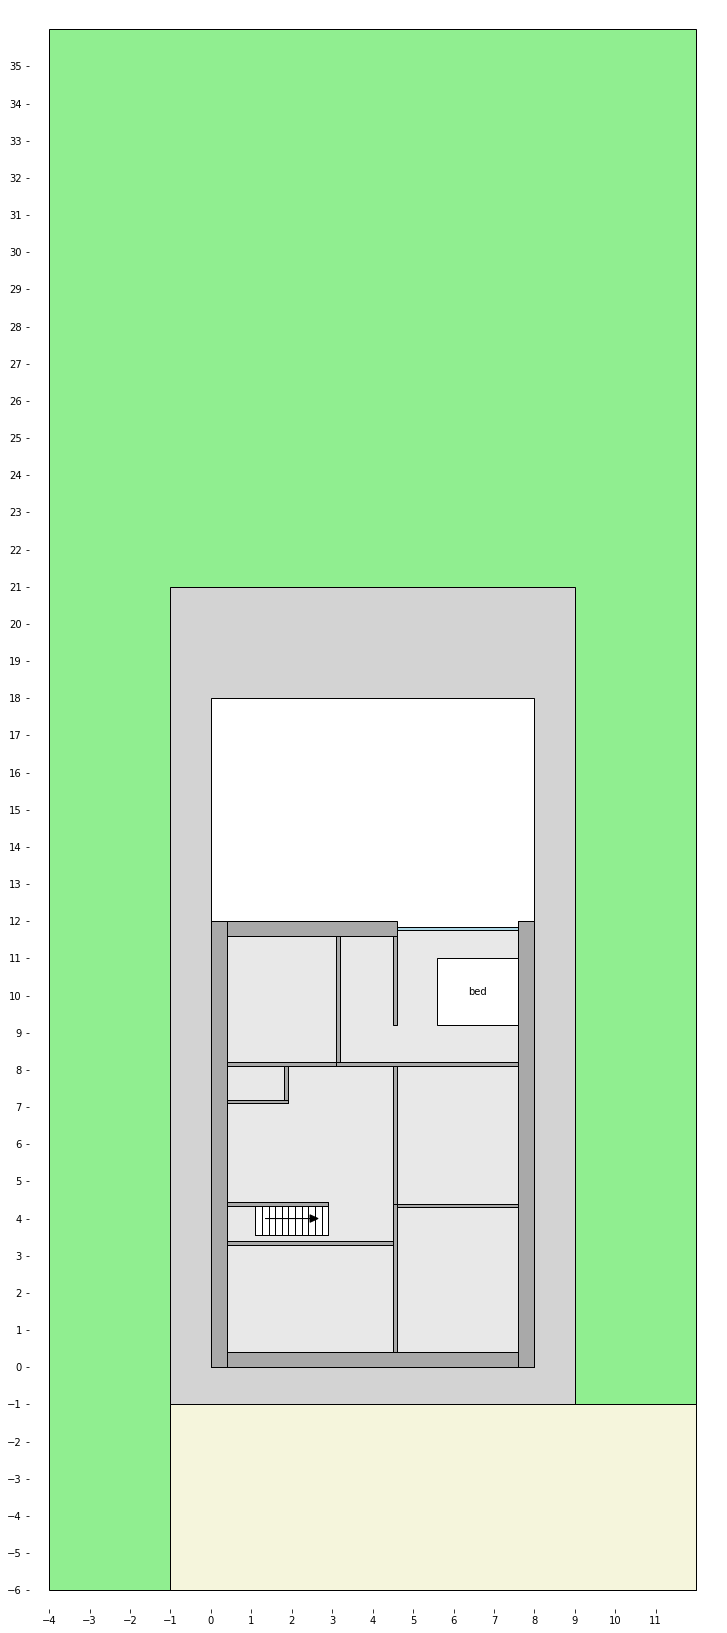

In [11]:
from floorplan2D import FloorPlan, InnerWall, OuterWall,Rect,Wall,HalfCircle,Arrow
import matplotlib.pyplot as plt
import numpy as np

fp = FloorPlan()

binnentop = 12-OuterWall.width
binnenbottom = OuterWall.width
binnenleft = OuterWall.width
binnenright = 8-OuterWall.width

fp.add(Rect(-4,-6,8+4,42-6,"lightgreen"))
fp.add(Rect(-1,-6,8+4,-1,"#f5f5dc"))
fp.add(Rect(-1,-1,8+1,18+3,"lightgrey"))
fp.add(Rect(0,0,8,18,"white"))
fp.add(Rect(OuterWall.width/2,
    OuterWall.width/2,
    8-OuterWall.width/2,
    12-OuterWall.width/2,
    "#e8e8e8"))


#OUTER WALLS
fp.add
o = OuterWall.horizontal(0,0,8,"bottom")
fp.add(o)

o = OuterWall.horizontal(12,0,8,"top")
o.window(8-OuterWall.width-3,8-OuterWall.width)
fp.add(o)

lo = OuterWall.vertical(0,0,12,"left")
fp.add(lo)

o = OuterWall.vertical(8,0,12,"right")
#o.window(10.5,17.5)
#o.door(1,"top","left",1)
fp.add(o)


# Trap
traptop = bureaubottom
trapbottom = traptop-0.90
trapleft = binnenleft + 0.7
trapright = trapleft + 2.5 - 0.7
fp.add(Rect(trapleft,trapbottom,trapright,traptop))
n_treden = 12
ycos = np.linspace(trapleft,trapright,n_treden)
for i,j in zip(ycos[:-1],ycos[1:]):
    fp.add(Rect(i,trapbottom,j,traptop))
fp.add(Arrow(trapleft + 0.25,(traptop+trapbottom)/2, 1.3,0))

#master slaapkamer

masterslpktop = binnentop
masterslpkbottom = masterslpktop - 3.5
masterslpkright = binnenright
masterslpkleft = masterslpkright - 4.5
w = InnerWall.vertical(masterslpkleft,masterslpkbottom,masterslpktop,"left")
fp.add(w)
w = InnerWall.horizontal(masterslpkbottom,masterslpkleft,masterslpkright,"bottom")
fp.add(w)
w = InnerWall.vertical(masterslpkright-3,masterslpkbottom+InnerWall.width+1,masterslpktop,"right")
fp.add(w)

bedright = masterslpkright
bedleft = bedright-2
bedtop = masterslpktop - 0.6
bedbottom = bedtop -1.80
fp.add(Rect(bedleft,bedbottom,bedright,bedtop,text="bed"))

# badkamer
badkamertop = binnentop
badkamerbottom = masterslpkbottom
badkamerleft = binnenleft
badkamerright = masterslpkleft
w = InnerWall.horizontal(badkamerbottom,badkamerleft,badkamerright,"bottom")
fp.add(w)


#slaapkamer 1
slpk1bottom = binnenbottom
slpk1top = slpk1bottom + 3
slpk1left = binnenleft
slpk1right = binnenright - 3
w = InnerWall.horizontal(slpk1top,slpk1left,slpk1right,"top")
fp.add(w)
w = InnerWall.vertical(slpk1right,slpk1bottom,slpk1top,"right")
fp.add(w)
print("slpk1",slpk1top-slpk1bottom,slpk1right-slpk1left)

#slaapkamer 2
slpk2bottom = binnenbottom
slpk2top = slpk2bottom + 4
slpk2left = slpk1right
slpk2right = binnenright
w = InnerWall.vertical(slpk2left,slpk2bottom,slpk2top,"right")
fp.add(w)
w = InnerWall.horizontal(slpk2top,slpk2left,slpk2right,"top")
fp.add(w)
print("slpk2",slpk2top-slpk2bottom,slpk2right-slpk2left)

# slaapkamer 3
slpk3bottom = slpk2top
slpk3top = masterslpkbottom
slpk3left = slpk2left
slpk3right = binnenright
w = InnerWall.vertical(slpk3left,slpk3bottom,slpk3top,"right")
fp.add(w)
w = InnerWall.horizontal(slpk3top,slpk3left,slpk3right,"top")
#fp.add(w)
print("slpk3",slpk3top-slpk3bottom,slpk3right-slpk3left)

# technische ruimte
techniektop = badkamerbottom - 1
techniekleft = binnenleft
techniekright = techniekleft + 3
techniekbottom = slpk2top
w = InnerWall.vertical(techniekright,techniekbottom,techniektop,"right")
#fp.add(w)
#w = InnerWall.horizontal(techniektop,techniekleft,techniekright,"top")
#fp.add(w)

# toilet
toilettop = badkamerbottom
toiletleft = binnenleft
toiletright = toiletleft + 1.5
toiletbottom = toilettop-1
w = InnerWall.vertical(toiletright,toiletbottom,toilettop,"right")
fp.add(w)
w = InnerWall.horizontal(toiletbottom,toiletleft,toiletright,"bottom")
fp.add(w)


# hal
w = InnerWall.horizontal(traptop,binnenleft,trapright,"top")
fp.add(w)
#fp.add()
print("dressing kinderen:",trapright-binnenleft)

fp.draw(0.7)